In [17]:
from qalcore.qiskit.vqls.vqls import VQLS
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.quantum_info import Statevector
from qiskit import Aer
import numpy as np

# Using VQLS to Solve the Poisson Equation 

The Poisson equation reads:

$$
\nabla^2 u = f
$$ 

with $u(0)=u(1)=0$. Using finite difference this equation can be rewritten as 

$$
\begin{pmatrix}
2 & -1 & 0 & 0 & \cdots & 0\\
-1&  2 & -1& 0 & \cdots & 0\\
0 & -1&  2 & -1& \cdots & 0\\
\vdots & \vdots&  \vdots & \ddots& \ddots & \ddots\\
0 & 0&  0 & \cdots& \cdots & -1\\
0 & 0&  0 & \cdots& -1& 2\\
\end{pmatrix} \begin{pmatrix}
u_1 \\
u_2 \\
u_3 \\
\vdots \\
\vdots \\
u_n
\end{pmatrix} = 

\begin{pmatrix}
f_1 \\
f_2 \\
f_3 \\
\vdots \\
\vdots \\
f_n
\end{pmatrix}
$$

Which can be solved using VQLS

In [22]:
#construct the matrix
from qiskit.quantum_info.operators import Operator
from qiskit.algorithms.linear_solvers.matrices import TridiagonalToeplitz
import numpy as np 
nqbits = 2
matrix = TridiagonalToeplitz(nqbits, 2, -1).matrix

matrix

array([[ 2., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [ 0.,  0., -1.,  2.]])

In [23]:
# construct the right hand side
vector = np.ones(matrix.shape[0])
vector

array([1., 1., 1., 1.])

In [24]:
#compute the classical solution
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))
ref_sol = classical_solution.state / np.linalg.norm(classical_solution.state)
ref_sol = np.insert(ref_sol, [0,2**nqbits], [0,0])

In [25]:
# compute the VQLS solution
ansatz = RealAmplitudes(nqbits, entanglement="full", reps=3, insert_barriers=False)
vqls = VQLS(
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=200, disp=True),
    quantum_instance=Aer.get_backend("aer_simulator_statevector"),
)
res = vqls.solve(matrix, vector)

vqls_solution = np.real(Statevector(res.state).data)
vqls_solution = np.insert(vqls_solution, [0,2**nqbits], [0,0])

Cost function 0.969831
Cost function 0.981673
Cost function 0.971228
Cost function 0.993581
Cost function 0.973933
Cost function 0.970888
Cost function 0.970875
Cost function 0.992486
Cost function 0.943302
Cost function 0.952064
Cost function 0.950849
Cost function 0.948263
Cost function 0.950172
Cost function 0.940758
Cost function 0.945032
Cost function 0.946193
Cost function 0.909525
Cost function 0.902123
Cost function 0.926090
Cost function 0.900763
Cost function 0.913105
Cost function 0.885577
Cost function 0.916710
Cost function 0.859714
Cost function 0.863614
Cost function 0.830557
Cost function 0.899084
Cost function 0.895002
Cost function 0.699827
Cost function 0.915876
Cost function 0.794748
Cost function 0.610572
Cost function 0.689662
Cost function 0.739195
Cost function 0.667089
Cost function 0.936063
Cost function 0.711439
Cost function 0.589729
Cost function 0.220562
Cost function 0.051768
Cost function 0.656142
Cost function 0.039252
Cost function 0.573063
Cost functi

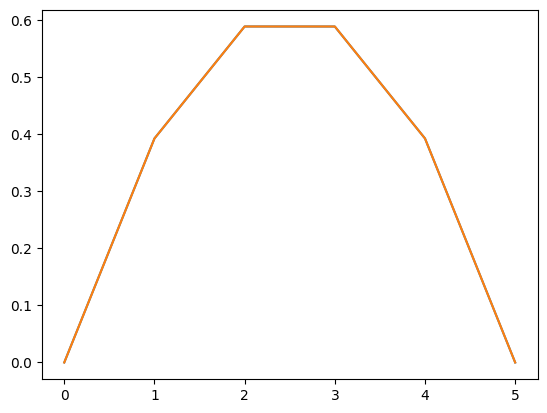

In [26]:
import matplotlib.pyplot as plt
plt.plot(vqls_solution)
plt.plot(ref_sol)
